## Compute Correlation Matrix, Cpfl1 dataset

To investigate the relationships of all measured features a correlation matrix will be computed. The computation is based on functions from `pandas` and `seaborn`.

The correlation matrix will be calculated with the values averaged by `image_id`. Additionally, the correlation matrix will be computed with values only from the ages P14, 20, 30, 70, and 245. The age P08 will be excluded, because some features show an increase from P08 until P14, and afterwards a decrease.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sys
sys.path.append("../../")
from quapos_lm import correlation_matrix

In [2]:
# Define path where measurements are stored
path = "../../measurements/cpfl/"

# Define path where plots should be saved
save_path = "../../plots-images/quapos-paper/figure-3-plots/"

In [3]:
# Load measurements
measurements = pd.read_csv(path + "09-columns-renamed.csv")

# Move age to the last column, will be displayed at bottom row of the correlation matrix/heatmap
cols = list(measurements.columns)
cols.append(cols.pop(cols.index("age")))
measurements = measurements[cols]
measurements

,image_id,max_intensity,mean_intensity,median_intensity,minimum_intensity,sigma_intensity,sum_intensity,variance_intensity,flatness,elongation,...,major_axis_length_2d,minor_axis_length_2d,surface_area,bbox_volume,convex_volume_rescaled,volume,label,genotype,summed_volume,age
0,0,435.323232,231.815654,215.544626,136.808081,67.478992,50966.181818,8476.601950,1.525459,1.540500,...,2.481628,1.372441,19.037570,17.155822,8.109028,5.670840,99,cpfl,563.030645,8.0
1,1,460.709677,224.380055,206.129242,126.634409,70.985109,56809.064516,8270.087836,1.629387,1.492952,...,2.841319,1.473626,24.355526,21.933224,10.160933,6.959598,93,cpfl,648.556847,8.0
2,2,510.370968,252.925858,232.679688,141.645161,81.942129,46226.919355,12177.344482,1.478168,1.576010,...,2.152691,1.295106,16.577307,13.719543,6.730957,4.823200,62,cpfl,300.083068,8.0
3,3,608.186207,293.062064,266.616379,157.948276,99.985899,94890.186207,16773.811155,1.415236,1.719627,...,3.531725,1.585332,27.055333,25.996121,12.821610,8.657550,290,cpfl,3659.193719,14.0
4,4,648.180556,298.264152,268.251157,154.018519,107.243126,104264.393519,18925.976599,1.424420,1.665247,...,3.524640,1.744031,27.524135,29.736536,13.434220,9.092604,216,cpfl,3710.954257,14.0
5,5,546.748148,272.073887,250.414280,153.170370,86.006519,84179.600000,11148.498631,1.464712,1.755708,...,3.568040,1.559667,27.394193,29.199424,13.371972,8.435550,135,cpfl,2371.852523,14.0
6,6,487.565517,243.963166,224.548761,130.993103,77.417826,106942.248276,9129.420382,1.488183,1.683961,...,3.974969,1.837445,36.029479,39.587794,18.379267,11.898974,145,cpfl,2115.038030,20.0
7,7,442.237805,228.048594,211.738281,126.243902,69.436005,77319.286585,6960.528745,1.612874,1.633785,...,3.694451,1.541159,28.744134,31.292334,13.436362,9.488528,164,cpfl,1804.643293,20.0
8,8,359.148387,191.621903,179.647253,108.348387,52.769600,78788.929032,4414.103336,1.477569,1.664738,...,3.811786,1.790636,33.458424,35.488406,17.097196,10.850190,155,cpfl,2869.171547,20.0
9,9,865.575758,368.635598,323.865057,173.484848,155.070912,157599.121212,41263.537517,1.235098,1.591278,...,3.302101,1.937421,27.561774,26.845265,14.834386,10.540409,33,cpfl,953.964241,245.0


### Filter Cpfl1 dataset

The correlation matrix of the Cpfl1 dataset should be visualised independently from the WT control animals, to investigate whether there are internally differences between the genotype.

In [4]:
# Filter the Cpfl1 dataset
measurements_cpfl = measurements[(measurements["genotype"] == "cpfl") & (measurements["age"] > 8)]
measurements_cpfl

,image_id,max_intensity,mean_intensity,median_intensity,minimum_intensity,sigma_intensity,sum_intensity,variance_intensity,flatness,elongation,...,major_axis_length_2d,minor_axis_length_2d,surface_area,bbox_volume,convex_volume_rescaled,volume,label,genotype,summed_volume,age
3,3,608.186207,293.062064,266.616379,157.948276,99.985899,94890.186207,16773.811155,1.415236,1.719627,...,3.531725,1.585332,27.055333,25.996121,12.821610,8.657550,290,cpfl,3659.193719,14.0
4,4,648.180556,298.264152,268.251157,154.018519,107.243126,104264.393519,18925.976599,1.424420,1.665247,...,3.524640,1.744031,27.524135,29.736536,13.434220,9.092604,216,cpfl,3710.954257,14.0
5,5,546.748148,272.073887,250.414280,153.170370,86.006519,84179.600000,11148.498631,1.464712,1.755708,...,3.568040,1.559667,27.394193,29.199424,13.371972,8.435550,135,cpfl,2371.852523,14.0
6,6,487.565517,243.963166,224.548761,130.993103,77.417826,106942.248276,9129.420382,1.488183,1.683961,...,3.974969,1.837445,36.029479,39.587794,18.379267,11.898974,145,cpfl,2115.038030,20.0
7,7,442.237805,228.048594,211.738281,126.243902,69.436005,77319.286585,6960.528745,1.612874,1.633785,...,3.694451,1.541159,28.744134,31.292334,13.436362,9.488528,164,cpfl,1804.643293,20.0
8,8,359.148387,191.621903,179.647253,108.348387,52.769600,78788.929032,4414.103336,1.477569,1.664738,...,3.811786,1.790636,33.458424,35.488406,17.097196,10.850190,155,cpfl,2869.171547,20.0
9,9,865.575758,368.635598,323.865057,173.484848,155.070912,157599.121212,41263.537517,1.235098,1.591278,...,3.302101,1.937421,27.561774,26.845265,14.834386,10.540409,33,cpfl,953.964241,245.0
10,10,843.300000,332.582432,279.398438,140.400000,156.306563,223415.000000,36526.835109,1.368342,1.743805,...,3.931269,2.010286,34.071162,46.004874,20.903035,15.622517,10,cpfl,340.352497,245.0
11,11,557.210526,279.197616,252.671669,150.000000,98.585779,39635.210526,13333.290076,1.358281,1.627806,...,2.512296,1.309479,13.341061,9.871819,5.776592,4.191000,19,cpfl,344.665875,245.0
12,12,792.500000,327.141392,290.777344,164.166667,130.074197,105132.000000,29858.459879,1.179832,2.046284,...,3.639642,1.831799,25.939383,24.667131,12.226855,8.379636,6,cpfl,348.473779,245.0


### Filter out `image_id`, and `genotype`

To properly compute relevant features for the correlation matrix the `image_id` (similar to age) and the `genotype` (only 1 genotype left in correlation matrix) will be filtered out.

In [5]:
# Filter Cpfl1 dataset
measurements_cpfl = measurements_cpfl.drop(labels=["image_id", "genotype"], axis=1)
measurements_cpfl

,max_intensity,mean_intensity,median_intensity,minimum_intensity,sigma_intensity,sum_intensity,variance_intensity,flatness,elongation,sphericity,...,perimeter_2d,major_axis_length_2d,minor_axis_length_2d,surface_area,bbox_volume,convex_volume_rescaled,volume,label,summed_volume,age
3,608.186207,293.062064,266.616379,157.948276,99.985899,94890.186207,16773.811155,1.415236,1.719627,0.923058,...,8.747193,3.531725,1.585332,27.055333,25.996121,12.821610,8.657550,290,3659.193719,14.0
4,648.180556,298.264152,268.251157,154.018519,107.243126,104264.393519,18925.976599,1.424420,1.665247,0.900902,...,9.041931,3.524640,1.744031,27.524135,29.736536,13.434220,9.092604,216,3710.954257,14.0
5,546.748148,272.073887,250.414280,153.170370,86.006519,84179.600000,11148.498631,1.464712,1.755708,0.912565,...,8.949500,3.568040,1.559667,27.394193,29.199424,13.371972,8.435550,135,2371.852523,14.0
6,487.565517,243.963166,224.548761,130.993103,77.417826,106942.248276,9129.420382,1.488183,1.683961,0.804059,...,10.161918,3.974969,1.837445,36.029479,39.587794,18.379267,11.898974,145,2115.038030,20.0
7,442.237805,228.048594,211.738281,126.243902,69.436005,77319.286585,6960.528745,1.612874,1.633785,0.863495,...,8.767230,3.694451,1.541159,28.744134,31.292334,13.436362,9.488528,164,1804.643293,20.0
8,359.148387,191.621903,179.647253,108.348387,52.769600,78788.929032,4414.103336,1.477569,1.664738,0.844712,...,9.842299,3.811786,1.790636,33.458424,35.488406,17.097196,10.850190,155,2869.171547,20.0
9,865.575758,368.635598,323.865057,173.484848,155.070912,157599.121212,41263.537517,1.235098,1.591278,0.829497,...,9.257627,3.302101,1.937421,27.561774,26.845265,14.834386,10.540409,33,953.964241,245.0
10,843.300000,332.582432,279.398438,140.400000,156.306563,223415.000000,36526.835109,1.368342,1.743805,0.888358,...,10.781825,3.931269,2.010286,34.071162,46.004874,20.903035,15.622517,10,340.352497,245.0
11,557.210526,279.197616,252.671669,150.000000,98.585779,39635.210526,13333.290076,1.358281,1.627806,1.042674,...,6.389995,2.512296,1.309479,13.341061,9.871819,5.776592,4.191000,19,344.665875,245.0
12,792.500000,327.141392,290.777344,164.166667,130.074197,105132.000000,29858.459879,1.179832,2.046284,0.820871,...,9.386960,3.639642,1.831799,25.939383,24.667131,12.226855,8.379636,6,348.473779,245.0


### Compute the correlation matrix

The correlation matrix is now computed with a predefined function. The colorbar will be removed here (note: in the figure 4 of the paper the colorbar will be shown next to the correlation vector of the age).

Below you find the same correlation matrix with the colorbar.

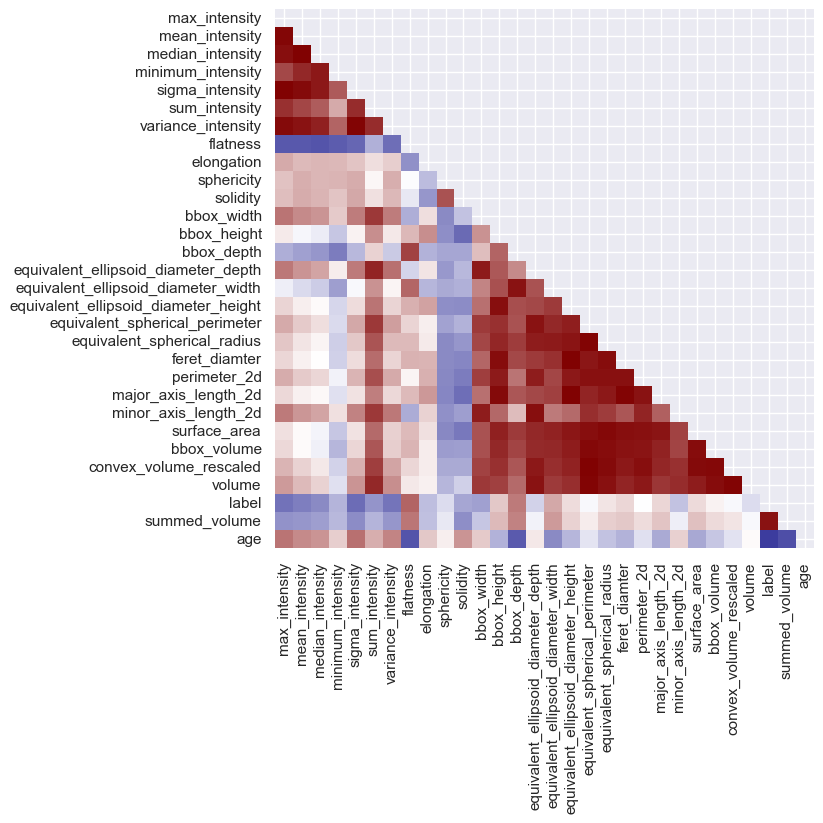

In [6]:
# Define plot size of the correlation matrix
plt.figure(figsize=(8, 7))

# Compute heatmap/correlation matrix
heatmap = correlation_matrix(measurements_cpfl, method="pearson", font_scale=1)

# Remove colorbar
heatmap.collections[0].colorbar.remove()

plt.savefig(save_path + "01-a-correlation-matrix-cpfl.png",
            dpi=300,
            bbox_inches="tight")

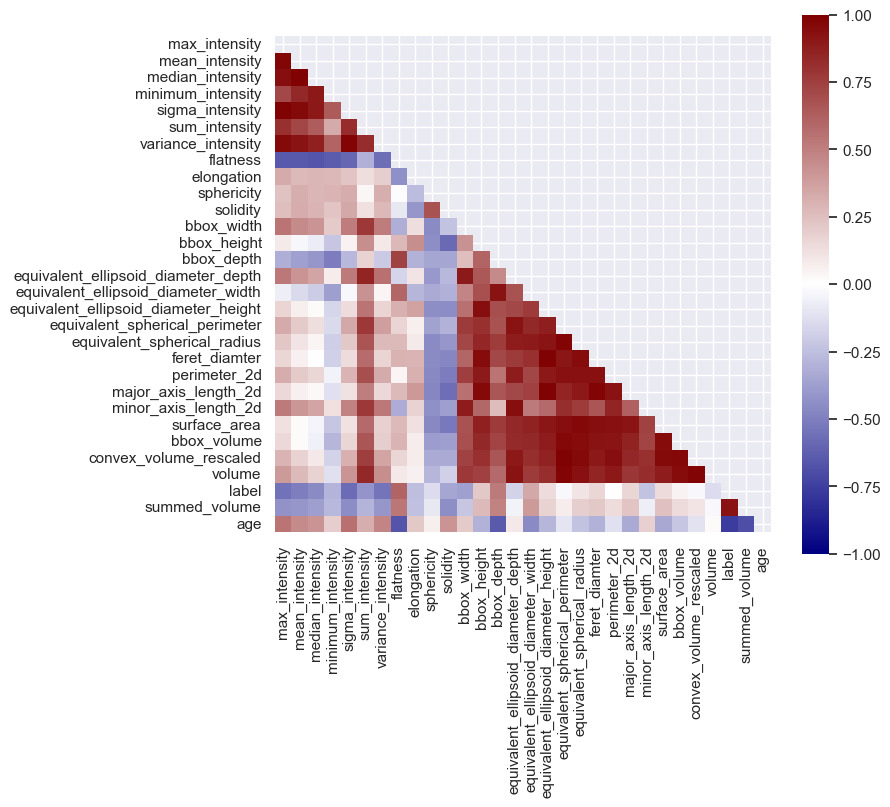

In [7]:
# Define plot size of the correlation matrix
plt.figure(figsize=(8, 7))

# Compute heatmap/correlation matrix
heatmap = correlation_matrix(measurements_cpfl, method="pearson", font_scale=1)